In [ ]:
import sys
!{sys.executable} -m pip install pycbc ligo-common emcee==2.2.1 --no-cache-dir

In [ ]:
%%shell
git clone https://github.com/SSingh087/lensotronomy-1.7.0.git
cd lensotronomy-1.7.0/
python setup.py install
cd ..
git clone https://github.com/SSingh087/lensGW.git
#git clone  https://github.com/Nancyjikadra/lensGW.git
cd lensGW
python setup.py install
cd ..
git clone https://github.com/SSingh087/lensGW-PyCBC-plugin.git
cd lensGW-PyCBC-plugin
python setup.py install
cd ..
git clone https://github.com/SSingh087/sensitivity-curves.git

Cloning into 'lensotronomy-1.7.0'...
remote: Enumerating objects: 710, done.
remote: Counting objects: 100% (710/710), done.
remote: Compressing objects: 100% (523/523), done.
remote: Total 710 (delta 177), reused 697 (delta 173), pack-reused 0
Receiving objects: 100% (710/710), 2.52 MiB | 6.98 MiB/s, done.
Resolving deltas: 100% (177/177), done.
/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ******************************

In [ ]:
''' RESTART SESSION '''

' RESTART SESSION '

In [ ]:
import numpy as np

# Load the .npy file
data = np.load('/content/drive/MyDrive/LNdata.npy')

# Print the content of the .npy file
print(data)

LNdata


In [ ]:
import numpy as np
from pycbc import waveform
import pylab
import random
from pycbc.detector import Detector
import pylab as plt
import numpy as np
import scipy.signal
import zipfile
import os

delta_t=1/4096
f_lower=50
optim='False'
distance=6791.8106
pol = 0

params = []
np.int = int

# Load the parameters from the .npy file
save_file = '/content/parameters.npy'
parameters_list = np.load(save_file, allow_pickle=True)

# Loop over the parameter lists
for parameters in parameters_list:
  # Unpack the parameters
  mass1, mass2, source_ra, source_dec, lens_mass = parameters

/usr/local/lib/python3.10/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


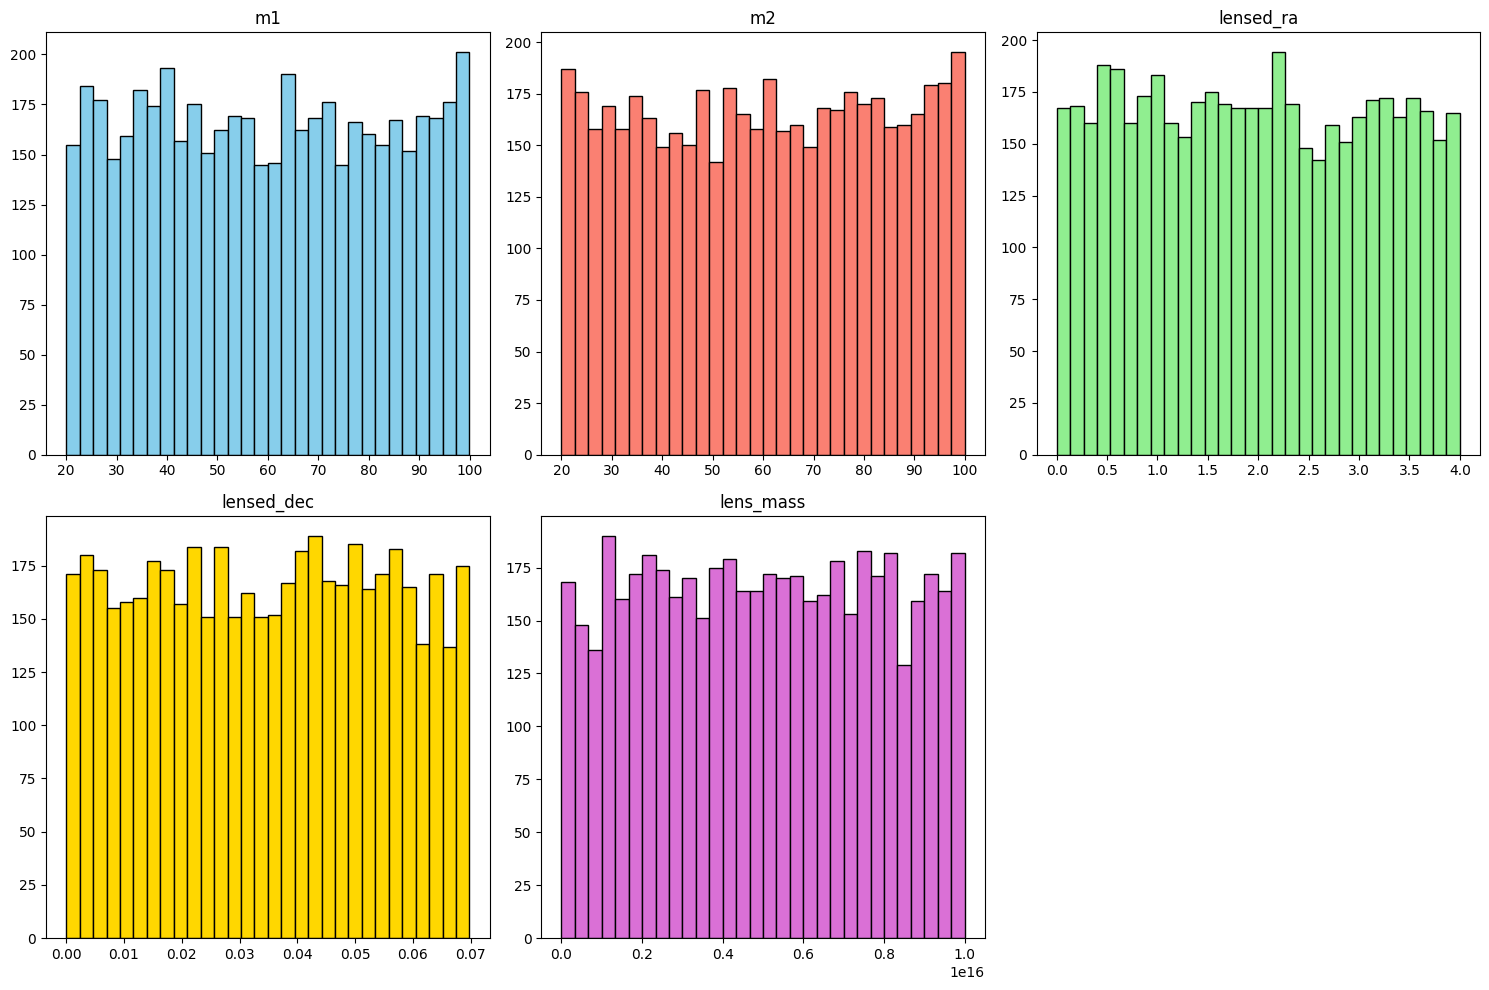

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved parameters
parameters_list = np.load('parameters.npy')

# Sort the parameters_list array based on the first column (m1_values)
parameters_list_sorted = sorted(parameters_list, key=lambda x: x[0])

# Save the sorted parameters
np.save('parameters_sorted.npy', parameters_list_sorted)

# Extract each parameter
m1_values = [params[0] for params in parameters_list_sorted]
m2_values = [params[1] for params in parameters_list_sorted]
lensed_ra_values = [params[2] for params in parameters_list_sorted]
lensed_dec_values = [params[3] for params in parameters_list_sorted]
lens_mass_values = [params[4] for params in parameters_list_sorted]

# Plot histograms for each parameter
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(m1_values, bins=30, color='skyblue', edgecolor='black')
plt.title('m1')

plt.subplot(2, 3, 2)
plt.hist(m2_values, bins=30, color='salmon', edgecolor='black')
plt.title('m2')

plt.subplot(2, 3, 3)
plt.hist(lensed_ra_values, bins=30, color='lightgreen', edgecolor='black')
plt.title('lensed_ra')

plt.subplot(2, 3, 4)
plt.hist(lensed_dec_values, bins=30, color='gold', edgecolor='black')
plt.title('lensed_dec')

plt.subplot(2, 3, 5)
plt.hist(lens_mass_values, bins=30, color='orchid', edgecolor='black')
plt.title('lens_mass')

plt.tight_layout()
plt.show()


In [ ]:
import random
import numpy as np
import os
import shutil
import scipy.signal

# Define the range of parameters
#m1,m2,lensed_ra,lensed_dec,lens mass   = 5 parameters
#source_ra=0,source_dec=0

# Set the drive location
drive_location = '/content/rawdata'


# Create the directory if it doesn't exist
if not os.path.exists(drive_location):
    os.makedirs(drive_location)

min_value = [20, 20, 0, 0, 1e9]
max_value = [100, 100, 4, np.pi/45, 1e16]


# Create a function to generate a list of 5 parameters
def generate_parameters():
  # Create an empty list to store the parameters
  parameters = []
  # Iterate over the range of parameters
  for i in range(5):
    # Generate a random value within the range
    value = random.uniform(min_value[i], max_value[i])
    # Add the value to the list of parameters
    parameters.append(value)
  # Return the list of parameters
  return parameters
# Generate 5000 lists of 5 parameters
parameters_list = []
for i in range(5000):
  parameters = generate_parameters()
  parameters_list.append(parameters)
  # Add leading zeros to the file name
  fname = '{:05d}'.format(i) + '.npy'
  np.save(os.path.join(drive_location, fname), parameters)

# Print the list of parameters
print(parameters_list)
np.save('parameters.npy', parameters_list)


[[50.85294912863099, 80.54351140799838, 2.1939628030296827, 0.06969736898571492, 3843144835011065.5], [97.0142664142937, 88.66105634582394, 1.5022068125000758, 0.05237384076808811, 9852785372361960.0], [57.97241269363607, 43.94280962569251, 2.538726263606386, 0.05355696596008073, 8385279849936693.0], [25.902744438755825, 75.46021783411598, 0.23994597661036243, 0.0583988507110776, 5794277712687154.0], [81.73309357167903, 85.68083903904639, 2.9181387813135533, 0.008796037826988783, 9105157608390900.0], [74.00456701879028, 78.08174560051853, 3.5224184996106227, 0.05514626421524945, 5723821664925019.0], [48.13913880016401, 81.13720425302469, 2.858277532795503, 0.022810409435756053, 6099023602005365.0], [93.92739236127159, 42.067566307079815, 2.928693252672489, 0.0635336714372656, 1911667804299729.5], [44.91548221311688, 64.36119535325594, 1.4424544414061744, 0.027107022599735076, 827430629150022.9], [22.240893948783143, 79.18161869916841, 3.2288512242767378, 0.06867998606227663, 6378010735